In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from shapely.geometry import Point
from IPython.display import display

In [2]:
# !pip install plotly

In [3]:
# !pip install ipywidgets

In [4]:
bs_crab = pd.read_csv("../data/Armistead; 1975 - 2017 eastern Bering Sea Crab Distribution For Web.csv")

In [5]:
NOAA_bottomtrawl = pd.read_csv("../data/Detailed Crab Data From NOAA Fisheries Service Annual Eastern Bering Sea Summer Bottom Trawl Surveys 1975 - 2018.csv")

C:\Users\seanf\AppData\Local\Temp\ipykernel_8896\1276909703.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  NOAA_bottomtrawl = pd.read_csv("../data/Detailed Crab Data From NOAA Fisheries Service Annual Eastern Bering Sea Summer Bottom Trawl Surveys 1975 - 2018.csv")


In [6]:
merged = pd.merge(bs_crab, NOAA_bottomtrawl, on=['cruise', 'haul', 'vessel'], how='inner')

In [7]:
merge = merged.drop_duplicates()

In [8]:
bs_crab['common_name'].value_counts()

common_name
snow crab               76678
southern Tanner crab    63414
red king crab           21622
hybrid Tanner crab      14737
blue king crab           7786
hair crab                5201
Name: count, dtype: int64

In [9]:
red_king = bs_crab[bs_crab['common_name'] == 'red king crab']
blue_king = bs_crab[bs_crab['common_name'] == 'blue king crab']
snow_crab = bs_crab[bs_crab['common_name'] == 'snow crab']
southern_tanner = bs_crab[bs_crab['common_name'] == 'southern Tanner crab']
hybrid_tanner = bs_crab[bs_crab['common_name'] == 'hybrid Tanner crab']
hair_crab = bs_crab[bs_crab['common_name'] == 'hair crab']

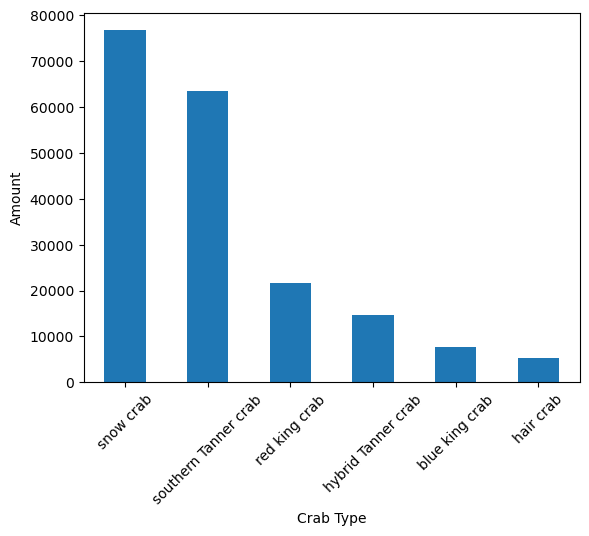

In [10]:
bs_crab['common_name'].value_counts().plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Crab Type')
plt.xticks(rotation=45)
plt.show()

In [11]:
bs_crab

,station_id,survey_year,start_date,common_name,scientific_name,cpue,maturity_code,maturity_name,bottom_depth,surface_temperature,bottom_temperature,vessel,cruise,haul,data_date,location_1,latitude,longitude,:@computed_region_btis_nwva
0,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,1.6,14,197502,2,2017-11-21T00:00:00.000,"{'latitude': '55.65', 'longitude': '-162.86667'}",55.65000,-162.86667,3.0
1,I-09,1975,1975-06-15T00:00:00.000,red king crab,Paralithodes camtschaticus,66,1,Immature male,44,3.2,0.4,14,197502,39,2017-11-21T00:00:00.000,"{'latitude': '57.66667', 'longitude': '-162.73...",57.66667,-162.73333,3.0
2,G-09,1975,1975-06-15T00:00:00.000,red king crab,Paralithodes camtschaticus,69,1,Immature male,60,2.5,1.6,14,197502,41,2017-11-21T00:00:00.000,"{'latitude': '57.0', 'longitude': '-162.76667'}",57.00000,-162.76667,3.0
3,I-14,1975,1975-06-10T00:00:00.000,red king crab,Paralithodes camtschaticus,1588,1,Immature male,49,0.3,0.1,14,197502,22,2017-11-21T00:00:00.000,"{'latitude': '57.68333', 'longitude': '-159.63...",57.68333,-159.63333,3.0
4,J-12,1975,1975-06-12T00:00:00.000,red king crab,Paralithodes camtschaticus,345,1,Immature male,49,1.9,1.7,14,197502,31,2017-11-21T00:00:00.000,"{'latitude': '58.0', 'longitude': '-160.85'}",58.00000,-160.85000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189433,V-25,2017,2017-07-31T00:00:00.000,hair crab,Erimacrus isenbeckii,76,8,Total male,62,11.1,-1.5,94,201701,215,2017-11-21T00:00:00.000,"{'latitude': '62.0047', 'longitude': '-173.738...",62.00470,-173.73871,NaN
189434,Q-18,2017,2017-06-30T00:00:00.000,hair crab,Erimacrus isenbeckii,75,9,Total female,36,5.2,5.1,162,201701,66,2017-11-21T00:00:00.000,"{'latitude': '60.33136', 'longitude': '-168.67...",60.33136,-168.67253,NaN
189435,J-03,2017,2017-06-26T00:00:00.000,hair crab,Erimacrus isenbeckii,66,9,Total female,61,7.4,0.8,94,201701,90,2017-11-21T00:00:00.000,"{'latitude': '57.99948', 'longitude': '-166.53...",57.99948,-166.53206,NaN
189436,N-19,2017,2017-07-08T00:00:00.000,hair crab,Erimacrus isenbeckii,75,9,Total female,51,5.6,3.7,162,201701,97,2017-11-21T00:00:00.000,"{'latitude': '59.33354', 'longitude': '-169.23...",59.33354,-169.23752,NaN


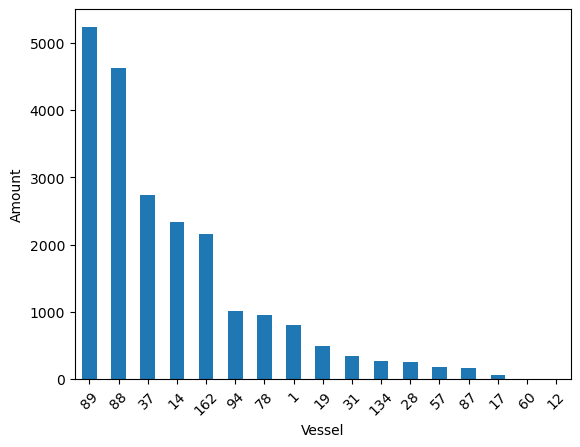

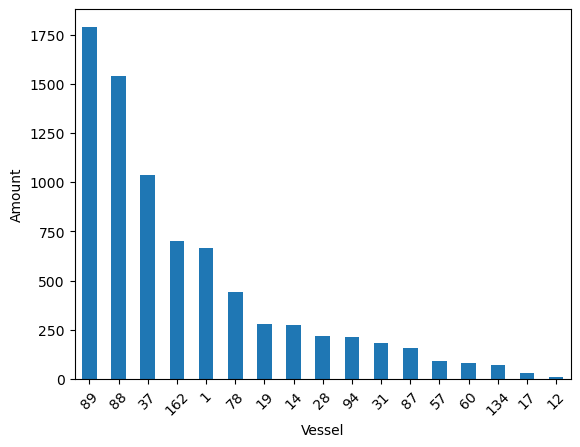

In [12]:
red_king['vessel'].value_counts().plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Vessel')
plt.xticks(rotation=45)
plt.show()

blue_king['vessel'].value_counts().plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Vessel')
plt.xticks(rotation=45)
plt.show()

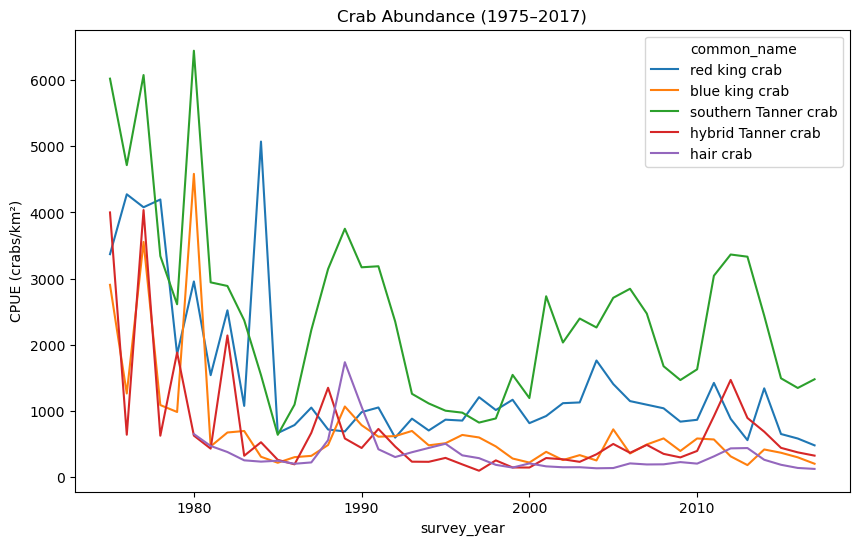

In [13]:
trends = bs_crab.groupby(['survey_year', 'common_name'])['cpue'].mean().unstack()

trends[['red king crab', 'blue king crab', 'southern Tanner crab', 'hybrid Tanner crab', 'hair crab']].plot(
    title='Crab Abundance (1975–2017)',
    ylabel='CPUE (crabs/km²)',
    figsize=(10, 6)
)
plt.show()

In [14]:
NOAA_bottomtrawl

,crab_id,hauljoin,cruise,vessel,haul,station,species_kfrc,species_code,species,sex__,...,egg_condition,clutch_size,chela_height,disease_code,disease_dorsal,disease_ventral,disease_legs,weight,comments,merus_length
0,689,899411.0,199701,88,103,P19,4,69400,Horsehair,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,690,899411.0,199701,88,103,P19,4,69400,Horsehair,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,691,899411.0,199701,88,103,P19,4,69400,Horsehair,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,692,899411.0,199701,88,103,P19,7,68580,Snow,2,...,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,693,899411.0,199701,88,103,P19,7,68580,Snow,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1058405,13050.0,199301,89,137,J24,7,68580,Snow,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,1058406,13050.0,199301,89,137,J24,7,68580,Snow,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,1058407,13054.0,199301,89,141,N24,7,68580,Snow,2,...,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,1058408,13054.0,199301,89,141,N24,7,68580,Snow,2,...,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
filtered_noaa = NOAA_bottomtrawl[['crab_id', 'hauljoin', 'cruise', 'vessel', 'haul', 'station', 'species_kfrc', 'species', 'sex',
 'shell_condition', 'sampling_factor', 'gis_station', 'width', 'weight', 'disease_dorsal', 'disease_ventral', 'disease_legs']]

In [16]:
cln_disease = filtered_noaa[[
    'crab_id', 'hauljoin', 'cruise', 'vessel', 'haul', 'station', 
    'species_kfrc', 'species', 'sex','shell_condition', 
    'sampling_factor', 'gis_station', 'width', 'weight', 
    'disease_dorsal', 'disease_ventral', 'disease_legs']].dropna(subset=['disease_dorsal', 'disease_ventral', 'disease_legs'], how='any')

In [17]:
filtered_noaa

,crab_id,hauljoin,cruise,vessel,haul,station,species_kfrc,species,sex,shell_condition,sampling_factor,gis_station,width,weight,disease_dorsal,disease_ventral,disease_legs
0,689,899411.0,199701,88,103,P19,4,Horsehair,Male,1,1.0000,P-19,NaN,NaN,NaN,NaN,NaN
1,690,899411.0,199701,88,103,P19,4,Horsehair,Male,1,1.0000,P-19,NaN,NaN,NaN,NaN,NaN
2,691,899411.0,199701,88,103,P19,4,Horsehair,Male,1,1.0000,P-19,NaN,NaN,NaN,NaN,NaN
3,692,899411.0,199701,88,103,P19,7,Snow,Female,1,1.0000,P-19,68.0,NaN,NaN,NaN,NaN
4,693,899411.0,199701,88,103,P19,7,Snow,Male,1,1.0000,P-19,83.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1058405,13050.0,199301,89,137,J24,7,Snow,Male,2,1.8047,J-24,70.0,NaN,NaN,NaN,NaN
1048571,1058406,13050.0,199301,89,137,J24,7,Snow,Male,2,1.8047,J-24,60.0,NaN,NaN,NaN,NaN
1048572,1058407,13054.0,199301,89,141,N24,7,Snow,Female,3,1.0000,N-24,51.0,NaN,NaN,NaN,NaN
1048573,1058408,13054.0,199301,89,141,N24,7,Snow,Female,2,1.0000,N-24,42.0,NaN,NaN,NaN,NaN


In [18]:
cln_disease['haul'] == 51

9348       False
9358       False
385033     False
385047     False
393568     False
           ...  
1024042    False
1026720    False
1026728    False
1026729    False
1039946    False
Name: haul, Length: 982, dtype: bool

In [19]:
print(cln_disease['cruise'].value_counts().head())
print(cln_disease['species'].value_counts().head())
print(cln_disease['haul'].value_counts().head())

cruise
198203    238
198201    143
198103    128
198002    124
198001     77
Name: count, dtype: int64
species
Snow             587
Tanner           352
Hybrid Tanner     41
Blue King          1
Horsehair          1
Name: count, dtype: int64
haul
51    137
89    108
66     78
97     60
73     52
Name: count, dtype: int64


In [20]:
print(cln_disease.groupby('haul')['cruise'].value_counts().head())
print(cln_disease.groupby('haul')['species'].value_counts().head())

haul  cruise
1     198101    25
      198001     2
2     198101     2
      198001     1
4     198001     1
Name: count, dtype: int64
haul  species  
1     Tanner       27
2     Tanner        3
4     Horsehair     1
      Snow          1
6     Tanner        1
Name: count, dtype: int64


In [21]:
merge = merged.drop_duplicates(subset='crab_id', keep='first')

In [22]:
merge = merge.drop(columns=[
    'scientific_name', 
    'weight',
    'maturity_code', 
    'data_date', 
    ':@computed_region_btis_nwva', 
    'hauljoin', 
    'station', 
    'species_kfrc', 
    'species_code',
    'species',
    'sex__',
    'length',
    'shell_condition',
    'sampling_factor',
    'gis_station',
    'width',
    'egg_color',
    'egg_condition',
    'clutch_size',
    'chela_height',
    'weight',
    'comments',
    'merus_length',
    ])

In [23]:
merge = merge.drop(columns=['location_1'])

In [24]:
disease_present = merge[merge['disease_code'].notna()]
disease_present

,station_id,survey_year,start_date,common_name,cpue,maturity_name,bottom_depth,surface_temperature,bottom_temperature,vessel,cruise,haul,latitude,longitude,crab_id,sex,disease_code,disease_dorsal,disease_ventral,disease_legs
3367904,D-04,1980,1980-05-12T00:00:00.000,red king crab,87,Legal,108,3.8,3.5,31,198001,4,56.00758,-165.76459,407708,Female,1.0,1.0,0.0,2.0
3406609,H-23,1980,1980-06-16T00:00:00.000,blue king crab,113,Mature male,99,5.6,3.1,14,198002,69,57.33617,-171.46809,402366,Female,1.0,3.0,0.0,0.0
3406610,H-23,1980,1980-06-16T00:00:00.000,blue king crab,113,Mature male,99,5.6,3.1,14,198002,69,57.33617,-171.46809,402367,Female,1.0,5.0,0.0,0.0
3406611,H-23,1980,1980-06-16T00:00:00.000,blue king crab,113,Mature male,99,5.6,3.1,14,198002,69,57.33617,-171.46809,402368,Female,1.0,5.0,0.0,0.0
3406742,H-23,1980,1980-06-16T00:00:00.000,blue king crab,113,Mature male,99,5.6,3.1,14,198002,69,57.33617,-171.46809,415583,Female,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12219661,D-06,1997,1997-06-18T00:00:00.000,southern Tanner crab,10956,Immature male,94,8.6,2.3,89,199701,50,55.99402,-164.58215,2443,Female,2.0,NaN,NaN,NaN
12222700,A-04,1997,1997-06-20T00:00:00.000,southern Tanner crab,1226,Immature male,132,7.7,4.5,89,199701,55,54.99498,-165.73877,9226,Female,1.0,8.0,3.0,0.0
12222710,A-04,1997,1997-06-20T00:00:00.000,southern Tanner crab,1226,Immature male,132,7.7,4.5,89,199701,55,54.99498,-165.73877,9236,Female,1.0,1.0,2.0,2.0
12355859,R-31,2013,2013-07-28T00:00:00.000,snow crab,1723,Immature male,147,9.3,1.2,89,201301,183,60.66880,-177.50340,2511045,Male,1.0,0.0,2.0,9.0


In [25]:
disease_present[disease_present['cruise'] == 198103]

,station_id,survey_year,start_date,common_name,cpue,maturity_name,bottom_depth,surface_temperature,bottom_temperature,vessel,cruise,haul,latitude,longitude,crab_id,sex,disease_code,disease_dorsal,disease_ventral,disease_legs
3943289,H-18,1981,1981-06-10T00:00:00.000,blue king crab,147,Mature male,77,7.5,3.9,1,198103,56,57.32900,-168.36700,458236,Male,1.0,0.0,1.0,9.0
3943406,O-26,1981,1981-07-24T00:00:00.000,blue king crab,133,Sublegal,108,9.2,2.2,1,198103,201,59.67800,-173.90709,470125,Female,1.0,0.0,0.0,1.0
3943408,O-26,1981,1981-07-24T00:00:00.000,blue king crab,133,Sublegal,108,9.2,2.2,1,198103,201,59.67800,-173.90709,470127,Female,1.0,1.0,1.0,2.0
3943410,O-26,1981,1981-07-24T00:00:00.000,blue king crab,133,Sublegal,108,9.2,2.2,1,198103,201,59.67800,-173.90709,470129,Female,1.0,1.0,1.0,3.0
3943479,O-26,1981,1981-07-24T00:00:00.000,blue king crab,133,Sublegal,108,9.2,2.2,1,198103,201,59.67800,-173.90709,470369,Female,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979181,E-18,1981,1981-06-05T00:00:00.000,southern Tanner crab,2257,Immature male,154,7.1,4.1,1,198103,52,56.32425,-168.23084,450703,Female,1.0,2.0,0.0,1.0
3979182,E-18,1981,1981-06-05T00:00:00.000,southern Tanner crab,2257,Immature male,154,7.1,4.1,1,198103,52,56.32425,-168.23084,450704,Female,1.0,2.0,0.0,1.0
3979183,E-18,1981,1981-06-05T00:00:00.000,southern Tanner crab,2257,Immature male,154,7.1,4.1,1,198103,52,56.32425,-168.23084,450705,Female,1.0,2.0,0.0,1.0
3979184,E-18,1981,1981-06-05T00:00:00.000,southern Tanner crab,2257,Immature male,154,7.1,4.1,1,198103,52,56.32425,-168.23084,450706,Female,1.0,7.0,0.0,0.0


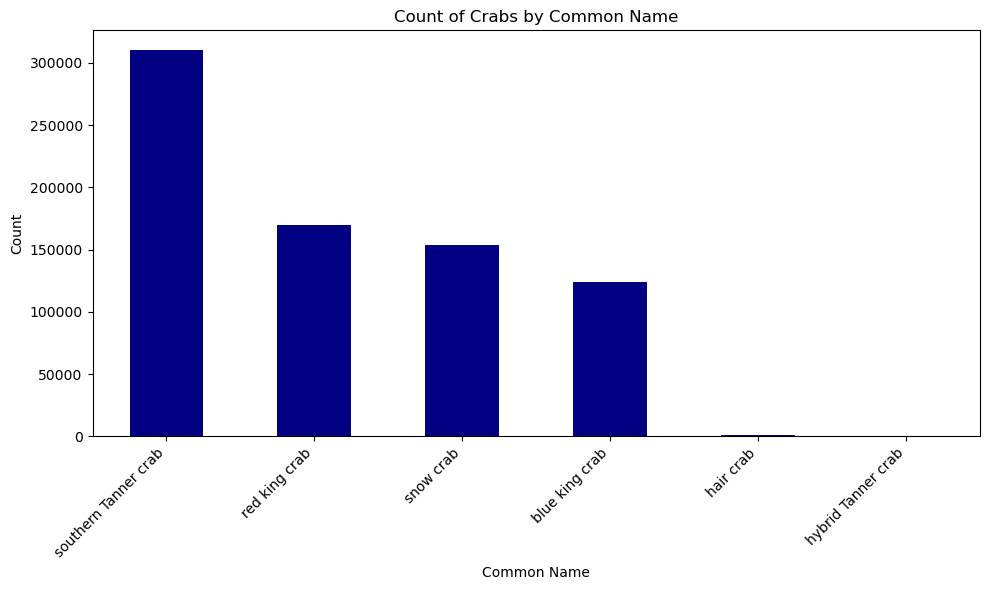

In [26]:
counts = merge['common_name'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='navy')

plt.title('Count of Crabs by Common Name')
plt.xlabel('Common Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

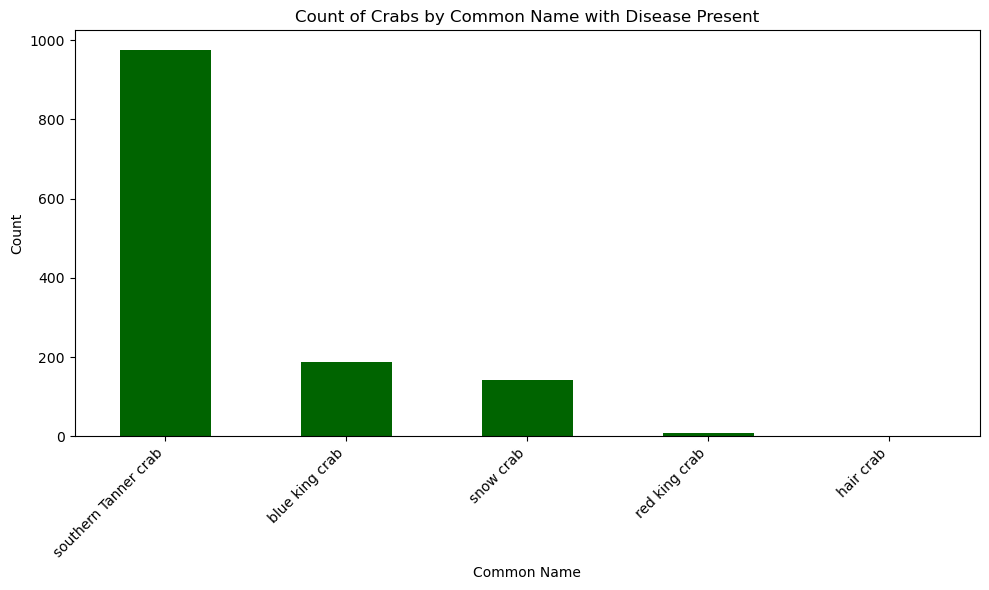

In [27]:
disease_crab_counts = disease_present['common_name'].value_counts()

plt.figure(figsize=(10, 6))
disease_crab_counts.plot(kind='bar', color='darkgreen')

plt.title('Count of Crabs by Common Name with Disease Present')
plt.xlabel('Common Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

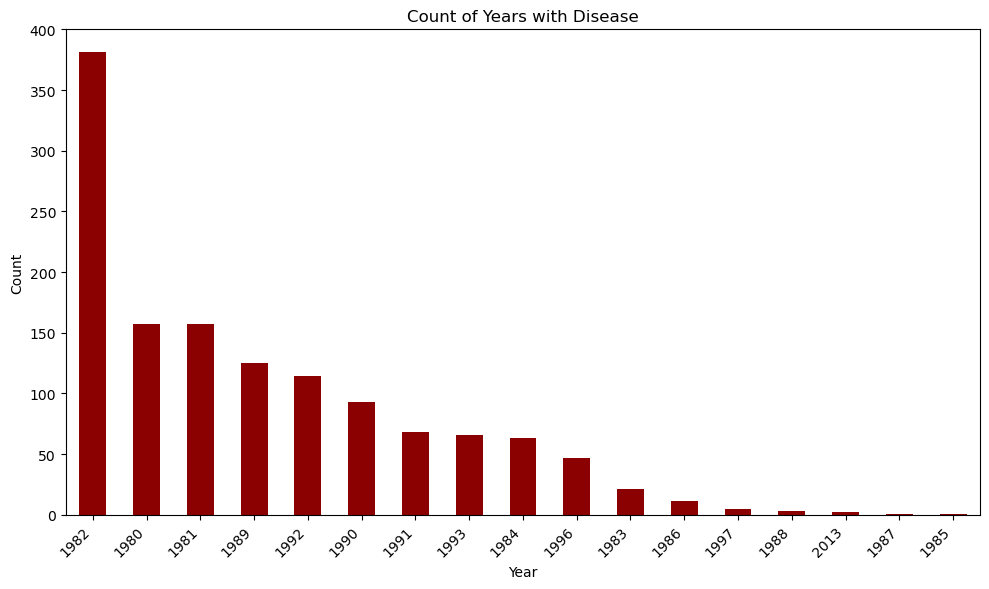

In [28]:
disease_year_counts = disease_present['survey_year'].value_counts()

plt.figure(figsize=(10, 6))
disease_year_counts.plot(kind='bar', color='darkred')

plt.title('Count of Years with Disease')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
center_lat = merge['latitude'].mean()
center_lon = merge['longitude'].mean()

In [41]:
m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

In [42]:
for _, row in disease_present.iterrows():
    popup_text = (
        f"<b>Common Name:</b> {row['common_name']}<br>"
        f"<b>Vessel:</b> {row['vessel']}<br>"
        f"<b>Haul:</b> {row['haul']}<br>"
        f"<b>Cruise:</b> {row['cruise']}<br>"
        f"<b>Survey Year:</b> {row['survey_year']}<br>"
        f"<b>Surface Temp:</b> {row['surface_temperature']} °C<br>"
        f"<b>Bottom Temp:</b> {row['bottom_temperature']} °C<br>"
        f"<b>Bottom Depth:</b> {row['bottom_depth']} m"
    )

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color='crimson',
        fill=True,
        fill_opacity=0.8,
        popup=folium.Popup(popup_text, max_width=350)
    ).add_to(m)

display(m)

In [46]:
disease_present_sorted = disease_present.sort_values('survey_year')
disease_present_sorted['disease_code'].value_counts()

disease_code
1.0    826
2.0    489
Name: count, dtype: int64

In [49]:
merge.to_csv('merge_data.csv', index=False)